In [20]:
from Bio import SeqIO
import gzip

# Define the input file
input_file = "/lunarc/nobackup/projects/lu2024-17-19/J_rAAven/BRAVE/raav-60/p006_test/barcode_fragment/barcode_p006_69bp.fastq.gz"

# Extract sequences
sequences = []
with gzip.open(input_file, "rt") as handle:
    for record in SeqIO.parse(handle, "fastq"):
        sequences.append(str(record.seq))
        
# only keep sequences of length 69
sequences = [seq for seq in sequences if len(seq) == 69]

# Save sequences to a text file for further processing
with open("barcode_p006_27bp.txt", "w") as f:
    for seq in sequences:
        f.write(seq + "\n")


In [21]:
import pandas as pd
import logomaker
import matplotlib.pyplot as plt

# Load sequences into a pandas DataFrame
sequence_df = pd.DataFrame([list(seq) for seq in sequences])

# Count occurrences of each nucleotide
counts_df = sequence_df.apply(pd.Series.value_counts).fillna(0)

# Convert counts to a probability matrix
probability_df = counts_df.div(counts_df.sum(axis=0), axis=1)

# transpose the matrix
probability_df = probability_df.T

probability_df = probability_df.iloc[42:, :]

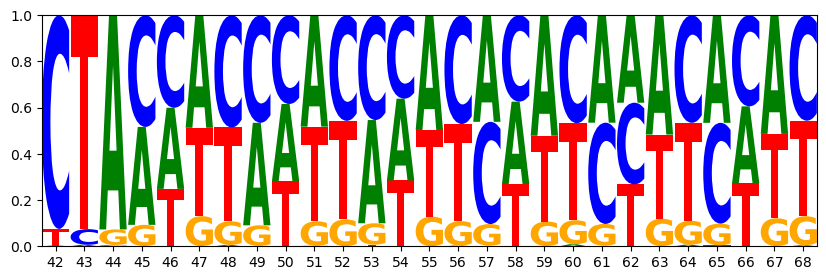

In [22]:
# Create the logo
logo = logomaker.Logo(probability_df, figsize=(10, 3))
logo.style_xticks(anchor=0, spacing=1)
# save the logo
plt.savefig("plots/logo_p006_43_68bp.png", dpi=300)